In [12]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_csv('./sample_data/ETH-USD.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,11/1/2018,197.537003,203.753998,197.328003,198.871994,198.871994,1336700000
1,11/2/2018,198.981995,201.268997,198.755005,200.634995,200.634995,1451870000
2,11/3/2018,200.740005,200.740005,199.524994,200.186005,200.186005,1307150000
3,11/4/2018,200.158005,211.272003,198.985992,207.485992,207.485992,1749300000
4,11/5/2018,207.100006,210.819000,206.572998,209.091003,209.091003,1613510000
...,...,...,...,...,...,...,...
1822,10/28/2023,1780.084229,1800.605347,1773.436646,1776.618164,1776.618164,4226112731
1823,10/29/2023,1776.563965,1810.488647,1766.052979,1795.546021,1795.546021,4358528382
1824,10/30/2023,1795.589111,1829.249512,1779.364502,1810.088623,1810.088623,7534051038
1825,10/31/2023,1810.131592,1819.972656,1784.567627,1816.458984,1816.458984,6477922747


In [13]:
# Hàm chuyển giá trị từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

In [14]:
# Áp dụng hàm chuyển đổi cho Date
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-01,197.537003,203.753998,197.328003,198.871994,198.871994,1336700000
1,2018-11-02,198.981995,201.268997,198.755005,200.634995,200.634995,1451870000
2,2018-11-03,200.740005,200.740005,199.524994,200.186005,200.186005,1307150000
3,2018-11-04,200.158005,211.272003,198.985992,207.485992,207.485992,1749300000
4,2018-11-05,207.100006,210.819000,206.572998,209.091003,209.091003,1613510000
...,...,...,...,...,...,...,...
1822,2023-10-28,1780.084229,1800.605347,1773.436646,1776.618164,1776.618164,4226112731
1823,2023-10-29,1776.563965,1810.488647,1766.052979,1795.546021,1795.546021,4358528382
1824,2023-10-30,1795.589111,1829.249512,1779.364502,1810.088623,1810.088623,7534051038
1825,2023-10-31,1810.131592,1819.972656,1784.567627,1816.458984,1816.458984,6477922747


In [15]:
# Chia train test validate theo tỉ lệ 6:2:2
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [16]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
#reshape(-1,1) đảm bảo rằng x_train là một mảng 2D
#np.array(...) chuyển đổi...sang mảng numpy
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [18]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa cho next 100 days
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 30 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[4423.57281561 4426.35759854 4429.14238147 4431.9271644  4434.71194733
 4437.49673026 4440.28151319 4443.06629612 4445.85107905 4448.63586198
 4451.42064491 4454.20542784 4456.99021077 4459.7749937  4462.55977663
 4465.34455956 4468.12934249 4470.91412542 4473.69890835 4476.48369128
 4479.26847421 4482.05325714 4484.83804007 4487.622823   4490.40760593
 4493.19238886 4495.97717179 4498.76195472 4501.54673765 4504.33152058
 4507.11630351 4509.90108644 4512.68586937 4515.4706523  4518.25543523
 4521.04021816 4523.82500109 4526.60978402 4529.39456695 4532.17934988
 4534.96413281 4537.74891574 4540.53369867 4543.3184816  4546.10326453
 4548.88804746 4551.67283039 4554.45761332 4557.24239625 4560.02717918
 4562.81196211 4565.59674504 4568.38152797 4571.1663109  4573.95109383
 4576.73587676 4579.52065969 4582.30544262 4585.09022555 4587.87500848
 4590.65979141 4593.44457434 4596.22935727 4599.0141402  4601.79892313
 4604.58370606 4607.36848899 

In [19]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2)) #mean: tính giá trị trung bình
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val)) #abs: giá trị tuyệt đối
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 2274.1174025993555
Testing RMSE: 1394.0892057496703
Validation MAE: 2260.709585469587
Testing MAE: 1188.622170755797
Validation MAPE: 140.46672385064804
Testing MAPE: 65.6153076004823


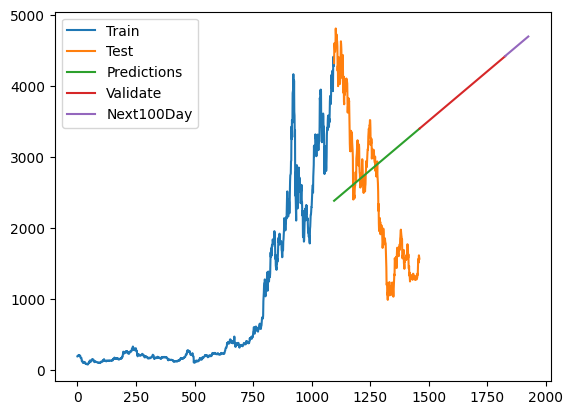

In [20]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next100Day'])
plt.show()

In [21]:
test_data.index

RangeIndex(start=1096, stop=1461, step=1)